# SED from DSPS spectra from calculating SFH with Diffstar

- adapted by SDC from https://github.com/ArgonneCPAC/dsps/blob/main/docs/source/dsps_quickstart.ipynb
-  CCIN2P3 on K80 GPU
- conda environnment : conda_jax0325
- creation date : 2023/09/26
- last update  : 2023/11/10

    pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
    python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"
    
    
   pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
    python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"
    
    
    
| computer | processor | kernel              |    date     |
| --- | --- | --- | --- |
| CC       | CPU       | conda_jax0325_py310 | 2023-11-10  |



libraries 
=========

- jaxlib-0.3.25+cuda11.cudnn82
- jaxopt
- optax
- corner
- arviz
- numpyro




(conda_jax0325_py310) 
`/pbs/throng/lsst/users/dagoret/desc/StellarPopulationSynthesis>pip list | grep` 

| lib | version |
|--- | --- | 
|jax  |                         0.4.20 |
|jaxlib |                       0.4.20 |
ïjaxopt  |                      0.8.2 |    

This notebook gives two basic illustrations of how to use diffstar to model the SFHs of individual and populations of galaxies.

### SFH of an individual diffstar galaxy

In the cell below, we'll grab the default diffmah and diffstar parameters, then we'l use the `sfh_singlegal` function to calculate the SFH.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'



## SFR with diffstar

In [2]:
import numpy as np
from diffstar.defaults import DEFAULT_MAH_PARAMS
from diffstar.defaults import DEFAULT_MS_PARAMS
from diffstar.defaults import DEFAULT_Q_PARAMS

today_gyr = 13.8 
tarr = np.linspace(0.1, today_gyr, 100)

In [3]:
print("SFR : 13 parameters")

SFR : 13 parameters


In [4]:
#mah_params = (lgm0, logtc, early_index, late_index)
print('MAH 4 params (lgm0, logtc, early_index, late_index) : ',DEFAULT_MAH_PARAMS)

MAH 4 params (lgm0, logtc, early_index, late_index) :  [12.    0.05  2.5   1.  ]


In [5]:
#ms_params = (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep)
print('MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ' ,DEFAULT_MS_PARAMS)

MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) :  [12. -1.  1. -1.  2.]


In [6]:
# q_params (lg_qt, qlglgdt, lg_drop, lg_rejuv)
print('Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ',DEFAULT_Q_PARAMS)

Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) :  [ 1.       -0.50725  -1.01773  -0.212307]


#### sfh_singlegal

In [7]:
from diffstar import sfh_singlegal

sfh_gal = sfh_singlegal(
    tarr, DEFAULT_MAH_PARAMS, DEFAULT_MS_PARAMS, DEFAULT_Q_PARAMS)

In [37]:
sfh_gal.shape

(100,)

In [9]:
#sfh_singlegal?

### SFHs of a population of diffstar galaxies

For purposes of this toy demonstration, we'll first create a small diffstar population by randomly adding noise to the default diffstar parameters.

In [10]:
n_gals = 10

mah_params_galpop = np.tile(DEFAULT_MAH_PARAMS, n_gals)
mah_params_galpop = mah_params_galpop.reshape((n_gals, -1))

ms_params_galpop = np.tile(DEFAULT_MS_PARAMS, n_gals)
ms_params_galpop = ms_params_galpop.reshape((n_gals, -1))

q_params_galpop = np.tile(DEFAULT_Q_PARAMS, n_gals)
q_params_galpop = q_params_galpop.reshape((n_gals, -1))

ms_noise = np.random.normal(
    loc=0, scale=0.25, size=(n_gals, DEFAULT_MS_PARAMS.size))

ms_params_galpop = ms_params_galpop + ms_noise

q_noise = np.random.normal(
    loc=0, scale=0.1, size=(n_gals, DEFAULT_Q_PARAMS.size))

q_params_galpop = q_params_galpop + q_noise

In [11]:
print('MAH params (lgm0, logtc, early_index, late_index) : ')
print(mah_params_galpop)

MAH params (lgm0, logtc, early_index, late_index) : 
[[12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]]


In [12]:
print('MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ')
print(ms_params_galpop)

MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : 
[[11.98817681 -0.72943757  0.78251881 -1.42111388  2.17611367]
 [11.76874144 -1.1678354   1.3547568  -1.54424633  2.12219968]
 [11.88976552 -0.82398607  0.9429948  -1.25253933  1.83500234]
 [12.45937845 -1.1437668   0.743233   -1.13285622  2.00589006]
 [11.33897202 -1.01526557  1.20006665 -0.70628314  2.32342779]
 [11.76290183 -1.07792707  0.93546912 -1.13511193  2.08444148]
 [12.29173902 -0.68835073  0.6558047  -1.091393    1.61922866]
 [12.39543084 -0.87458865  1.2052482  -1.0230916   2.47179082]
 [12.19019253 -1.13799907  1.05611604 -1.10621999  2.37526898]
 [12.22398448 -0.74039345  1.10828138 -0.61833577  1.70922042]]


In [13]:
print('Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ')
print(q_params_galpop)

Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : 
[[ 1.06084194 -0.48565506 -0.85762872 -0.29167694]
 [ 1.04761873 -0.62255994 -1.07422157 -0.19947025]
 [ 0.91470324 -0.61139729 -0.8848134  -0.35581126]
 [ 0.81827576 -0.40900675 -1.21974529 -0.23273614]
 [ 1.2349766  -0.43165956 -1.09236347 -0.19666022]
 [ 0.77520229 -0.47645612 -1.04468708 -0.070536  ]
 [ 1.02111659 -0.37195133 -1.03702883 -0.26607848]
 [ 0.91476845 -0.39750698 -1.09260376 -0.20896734]
 [ 0.97622767 -0.51688633 -0.79703978 -0.2119858 ]
 [ 0.83020824 -0.45305257 -0.9663458  -0.11580347]]


#### sfh_galpop

The `sfh_galpop` calculates the SFH of an entire population at once. This calculation is vectorized with `jax.vmap` and so will be more efficient than a loop over successive calls to `sfh_singlegal`.

In [14]:
from diffstar import sfh_galpop

sfh_pop = sfh_galpop(
    tarr, mah_params_galpop, ms_params_galpop, q_params_galpop)

In [15]:
sfh_pop.shape

(10, 100)

Text(0.5, 1.0, 'Simulated Star Formation History (SFH) (log Y scale)')

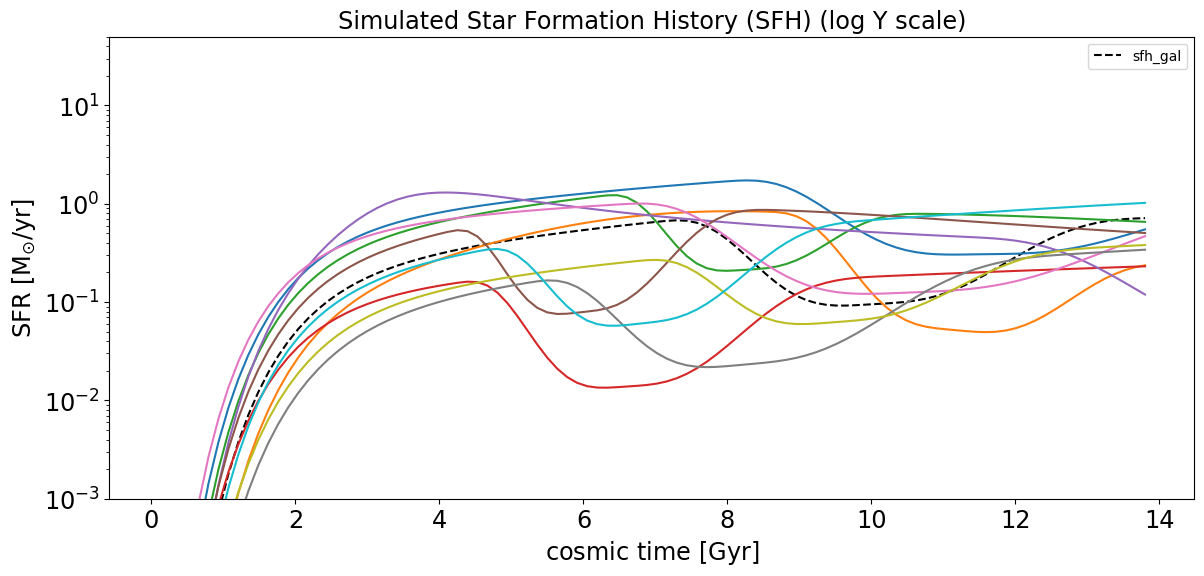

In [16]:


fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal')

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()
ax.set_title("Simulated Star Formation History (SFH) (log Y scale)")

Text(0.5, 1.0, 'Simulated Star Formation History (SFH) (linear Y scale)')

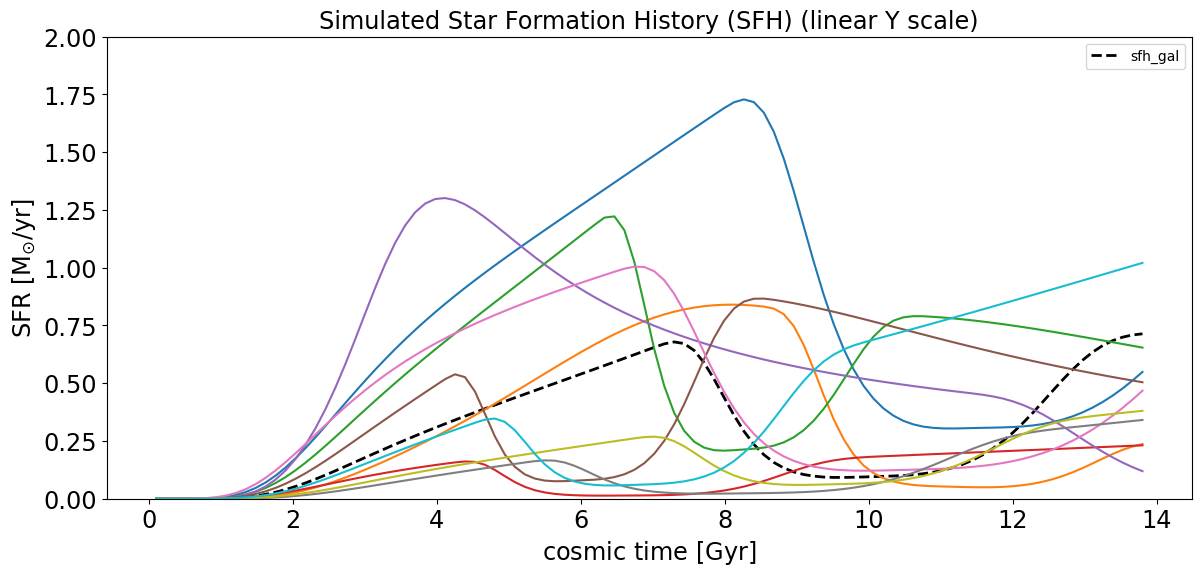

In [17]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
#yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal',lw=2)

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()
ax.set_ylim(0,2)

ax.set_title("Simulated Star Formation History (SFH) (linear Y scale)")

# SED with DSPS using previous SFR

In [18]:
import numpy as np
from diffstar.defaults import DEFAULT_MAH_PARAMS
from diffstar.defaults import DEFAULT_MS_PARAMS
from diffstar.defaults import DEFAULT_Q_PARAMS

today_gyr = 13.8 
#tarr = np.linspace(0.1, today_gyr, 100)

In [19]:
from dsps import load_ssp_templates
#ssp_data = load_ssp_templates(fn='tempdata_v2.h5')
ssp_data = load_ssp_templates(fn='tempdata.h5')

print(ssp_data._fields)

print('ssp_data : ssp_lgmet.shape = {}'.format(ssp_data.ssp_lgmet.shape))
print('ssp_data : ssp_lg_age_gyr.shape = {}'.format(ssp_data.ssp_lg_age_gyr.shape))
print('ssp_data : ssp_wave.shape = {}'.format(ssp_data.ssp_wave.shape))
print('ssp_data :ssp_flux.shape = {}'.format(ssp_data.ssp_flux.shape))

('ssp_lgmet', 'ssp_lg_age_gyr', 'ssp_wave', 'ssp_flux')
ssp_data : ssp_lgmet.shape = (12,)
ssp_data : ssp_lg_age_gyr.shape = (107,)
ssp_data : ssp_wave.shape = (5994,)
ssp_data :ssp_flux.shape = (12, 107, 5994)


In [20]:
import numpy as np
# table of ages in 100 bins in linear scale from 50 millions to 13.8 billions years
#gal_t_table = np.linspace(0.05, 13.8, 100) # age of the universe in Gyr
gal_t_table = tarr
# must put a true SFR using package diffstar
#gal_sfr_table = np.random.uniform(0, 10, gal_t_table.size) # SFR in Msun/yr
gal_sfr_table = sfh_gal
# metallicity
gal_lgmet = -2.0 # log10(Z)
gal_lgmet_scatter = 0.2 # lognormal scatter in the metallicity distribution function


In [21]:
from dsps.cosmology import age_at_z, DEFAULT_COSMOLOGY

print(DEFAULT_COSMOLOGY)

z_obs = 0.5
t_obs = age_at_z(z_obs, *DEFAULT_COSMOLOGY) # age of the universe in Gyr at z_obs
t_obs = t_obs[0] # age_at_z function returns an array, but SED functions accept a float for this argument

CosmoParams(Om0=0.3075, w0=-1.0, wa=0.0, h=0.6774)


In [22]:
from dsps import calc_rest_sed_sfh_table_lognormal_mdf
from dsps import calc_rest_sed_sfh_table_met_table

# calculate first SED with only one metallicity
print("gal_lgmet = ", gal_lgmet)

sed_info = calc_rest_sed_sfh_table_lognormal_mdf(
    gal_t_table, gal_sfr_table, gal_lgmet, gal_lgmet_scatter,
    ssp_data.ssp_lgmet, ssp_data.ssp_lg_age_gyr, ssp_data.ssp_flux, t_obs)

gal_lgmet =  -2.0


In [23]:
all_sed_info = []

for igal in range(n_gals):
   
    the_sed_info = calc_rest_sed_sfh_table_lognormal_mdf(gal_t_table, sfh_pop[igal, :], gal_lgmet, gal_lgmet_scatter,
    ssp_data.ssp_lgmet, ssp_data.ssp_lg_age_gyr, ssp_data.ssp_flux, t_obs)
    
    all_sed_info.append( the_sed_info)

Text(0.5, 1.0, 'SED $L_\\nu$ from the different SFH (log Y scale)')

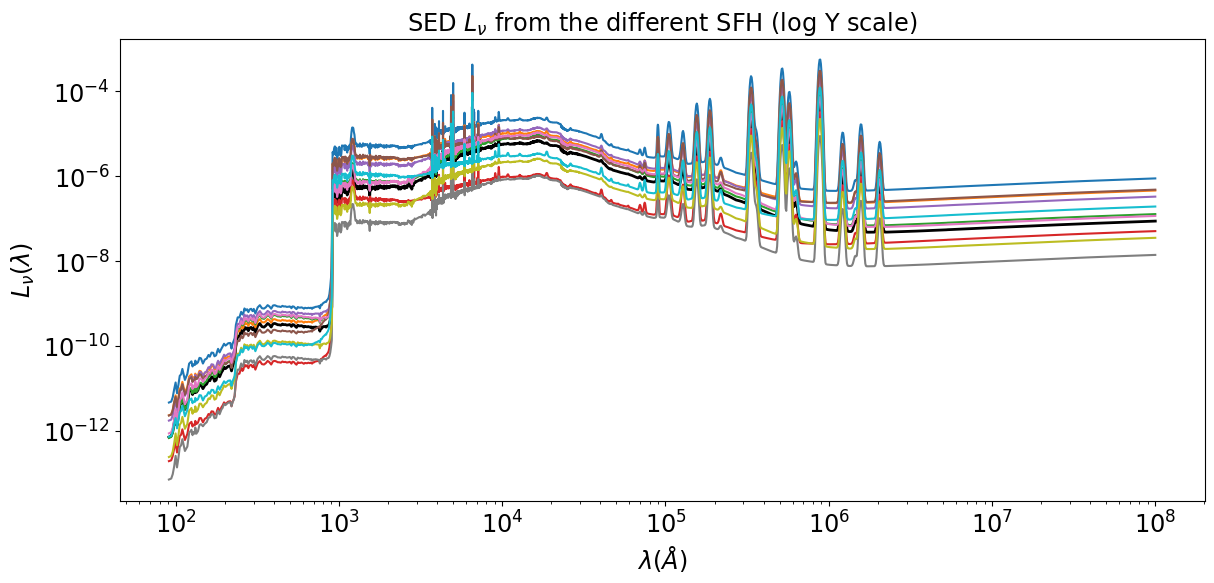

In [24]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()
__=ax.plot(ssp_data.ssp_wave, sed_info.rest_sed,'k-',lw=2)

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
ax.set_title("SED $L_\\nu$ from the different SFH (log Y scale)")    

Text(0.5, 1.0, 'SED $L_\\nu$ from the different SFH (linear Y scale)')

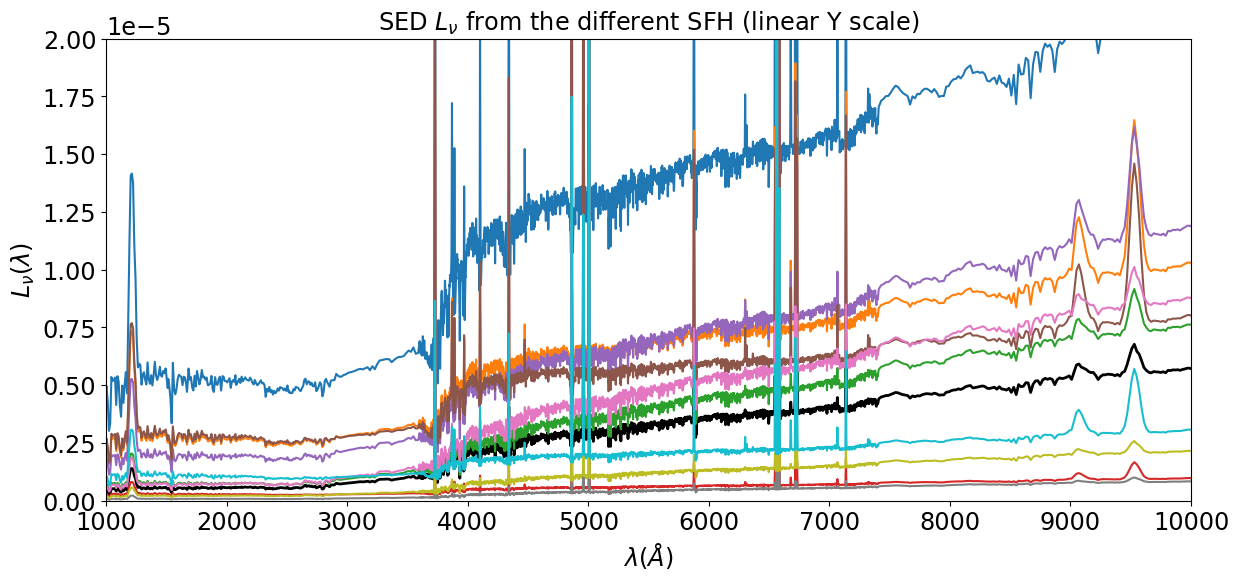

In [25]:
fig, ax = plt.subplots(1, 1)
#__=ax.loglog()
__=ax.plot(ssp_data.ssp_wave, sed_info.rest_sed,'k-',lw=2)

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed)
ax.set_xlim(1000.,1e4)
ax.set_ylim(0.,0.2e-4)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
ax.set_title("SED $L_\\nu$ from the different SFH (linear Y scale)")  

Text(0.5, 1.0, 'ratio of SED with different SFH by average parameter SED')

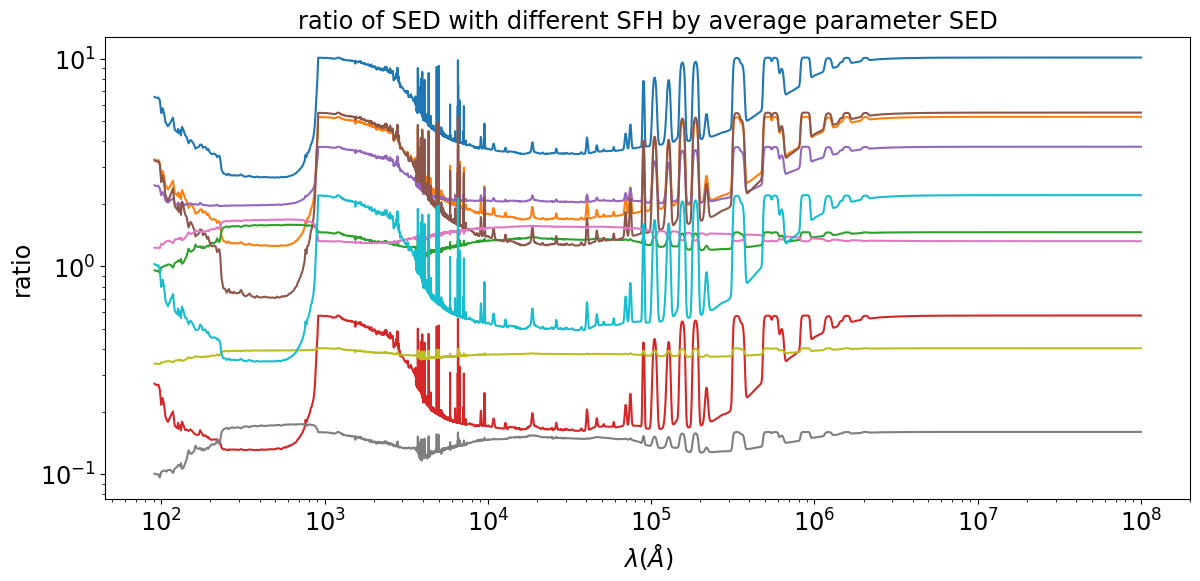

In [26]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed/ sed_info.rest_sed)
    
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("ratio")
ax.set_title("ratio of SED with different SFH by average parameter SED")

## Dust

In [27]:
from dsps.dust.att_curves import  sbl18_k_lambda, RV_C00,_frac_transmission_from_k_lambda

In [28]:
ssp_data.ssp_wave

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08])

In [29]:
wave_spec_micron = ssp_data.ssp_wave/10_000

In [30]:
Av= 1.0
uv_bump_ampl = 3.0
plaw_slope = -0.25

In [31]:
k = sbl18_k_lambda(wave_spec_micron,uv_bump_ampl,plaw_slope)
dsps_flux_ratio = _frac_transmission_from_k_lambda(k,Av)

In [32]:
sed_info.rest_sed.shape

(5994,)

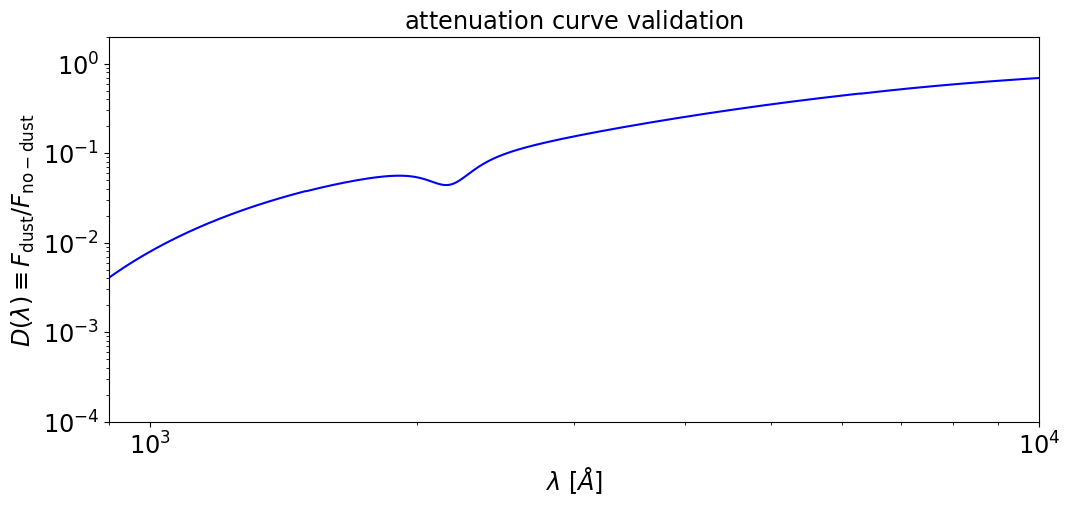

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
# fig.tight_layout(pad=3.0)


ax.plot(ssp_data.ssp_wave ,dsps_flux_ratio,'b-')

xlim = ax.set_xlim(900, 1e4)
ylim = ax.set_ylim(1e-4, 2)
__=ax.loglog()

title = ax.set_title(r'${\rm attenuation\ curve\ validation}$')
xlabel = ax.set_xlabel(r'$\lambda\ [\AA]$')
ylabel= ax.set_ylabel(r'$D(\lambda)\equiv F_{\rm dust}/F_{\rm no-dust}$')

Text(0.5, 1.0, 'Dust Attenuated SED $L_\\nu$ from the different SFH')

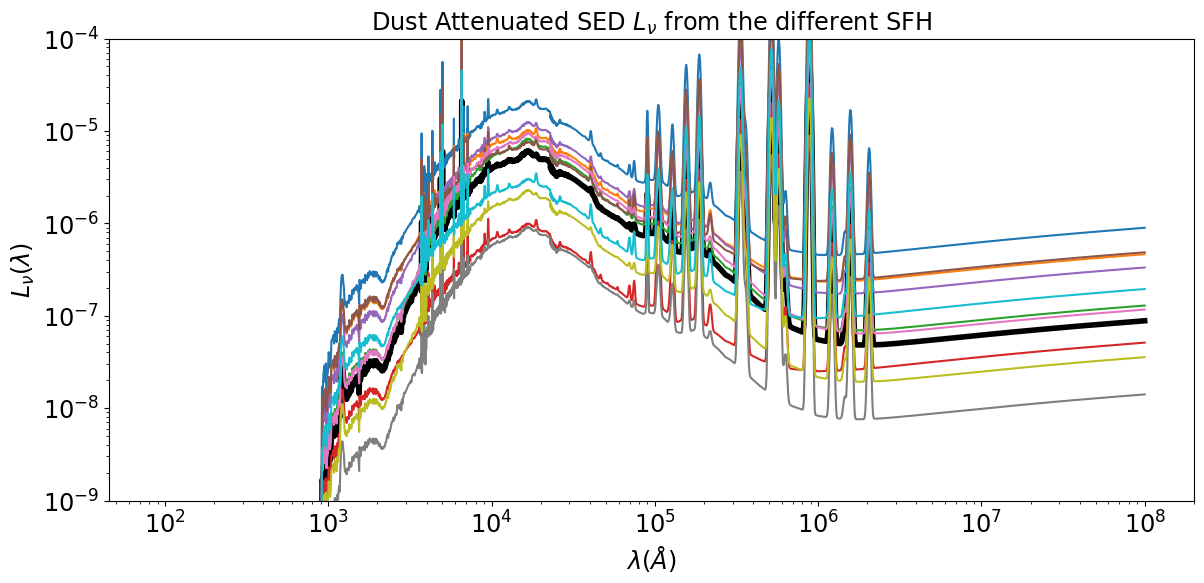

In [34]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

flux_attenuated_fnu = sed_info.rest_sed * dsps_flux_ratio
__=ax.plot(ssp_data.ssp_wave, flux_attenuated_fnu,'k-',lw=4)

for igal in range(n_gals):
    flux_attenuated_fnu = all_sed_info[igal].rest_sed * dsps_flux_ratio
    __=ax.plot(ssp_data.ssp_wave,flux_attenuated_fnu )
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
 
ax.set_ylim(1e-9,1e-4)
ax.set_title("Dust Attenuated SED $L_\\nu$ from the different SFH")

In [35]:
C = 3e18 # Angstrom per second 

Text(0.5, 1.0, 'Dust Attenuated SED $L_\\lambda$ from the different SFH')

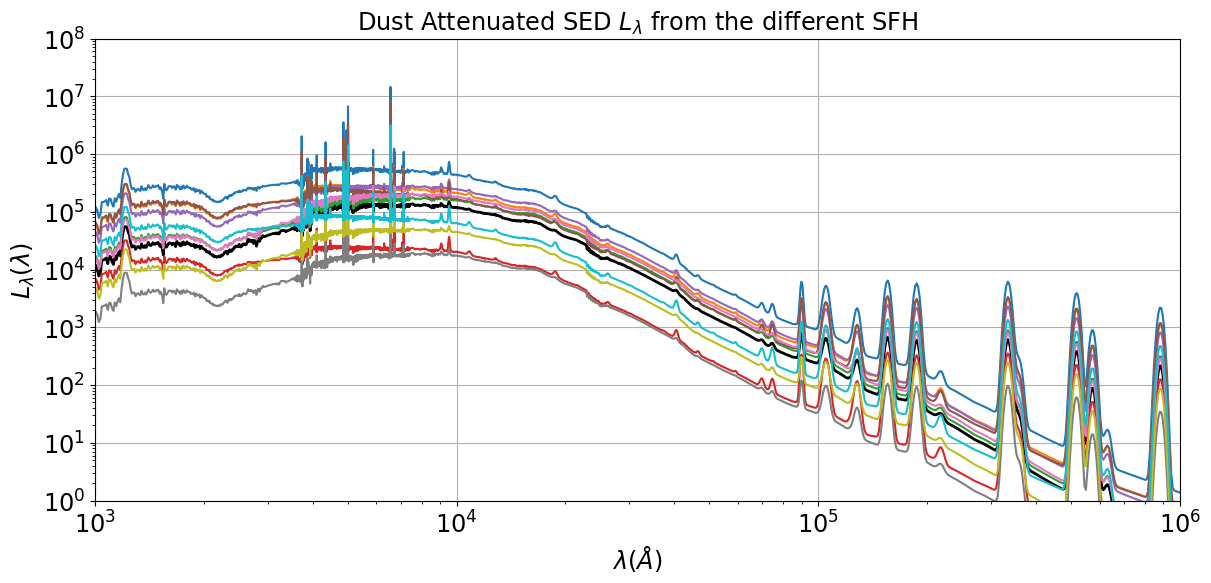

In [36]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

flux_attenuated_nu = sed_info.rest_sed * dsps_flux_ratio
flux_attenuated_lambda = flux_attenuated_nu/ssp_data.ssp_wave**2*C

__=ax.plot(ssp_data.ssp_wave, flux_attenuated_lambda,'k-',lw=2)

for igal in range(n_gals):
    flux_attenuated_nu = all_sed_info[igal].rest_sed * dsps_flux_ratio
    flux_attenuated_lambda = flux_attenuated_nu/ssp_data.ssp_wave**2*C
    __=ax.plot(ssp_data.ssp_wave,flux_attenuated_lambda )
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\lambda(\lambda)$")
 
ax.set_ylim(1,1e8)
ax.set_xlim(1e3,1e6)
ax.grid()
ax.set_title("Dust Attenuated SED $L_\\lambda$ from the different SFH")